## Regression Analysis Guide with scikit-learn

Regression analysis is a statistical method used to model the relationship between a dependent (target) variable and one or more independent (predictor) variables. The goal is to predict the value of the target variable based on the values of the predictor variables.

### 1. Simple Linear Regression 📈

**Simple Linear Regression** is used to model the relationship between two continuous variables. It assumes a linear relationship, meaning it tries to fit a straight line ($y = mx + c$) to the data that best represents the observations.

* **$y$**: Dependent variable
* **$x$**: Independent variable
* **$m$**: Slope of the line
* **$c$**: Y-intercept

Intercept (c): 4.142913319458566
Coefficient (m): 2.7993236574802762
Mean Squared Error: 0.6536995137170021
R-squared: 0.8072059636181392


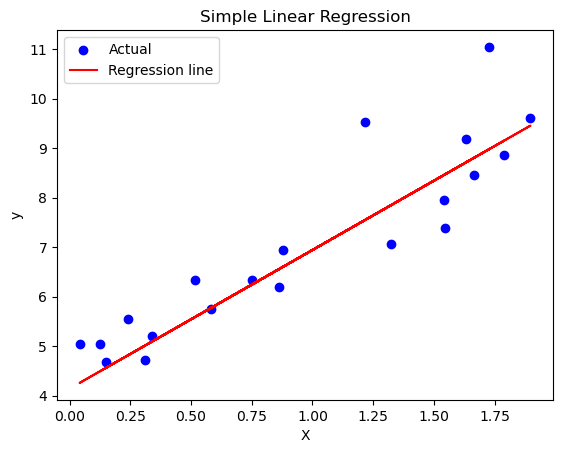

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(f"Intercept (c): {lin_reg.intercept_[0]}")
print(f"Coefficient (m): {lin_reg.coef_[0][0]}")

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Polynomial Regression 🎢

**Polynomial Regression** is used when the relationship between variables is non-linear.

R-squared: 0.9944087624623351


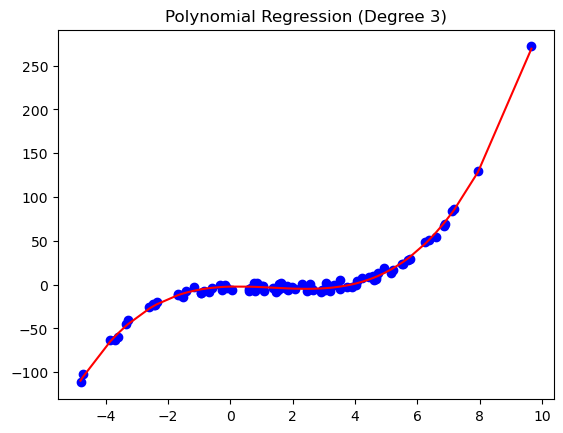

In [2]:
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 100)
X = X[:, np.newaxis]
y = y[:, np.newaxis]

degree = 3
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

y_poly_pred = poly_reg.predict(X_poly)
print(f"R-squared: {r2_score(y, y_poly_pred)}")

X_sorted, y_poly_pred_sorted = zip(*sorted(zip(X, y_poly_pred)))

plt.scatter(X, y, color='blue')
plt.plot(X_sorted, y_poly_pred_sorted, color='red')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.show()

### 3. Ridge & Lasso Regression (Regularization) ⚖️

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
print(f"Ridge R2: {r2_score(y_test, ridge_reg.predict(X_test_scaled))}")

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
print(f"Lasso R2: {r2_score(y_test, lasso_reg.predict(X_test_scaled))}")
print(f"Number of zero coeffs in Lasso: {np.sum(lasso_reg.coef_ == 0)}")

Ridge R2: 0.5758157428913679
Lasso R2: 0.4813611325029077
Number of zero coeffs in Lasso: 5


### 4. Logistic Regression ✅/❌

Accuracy: 1.0


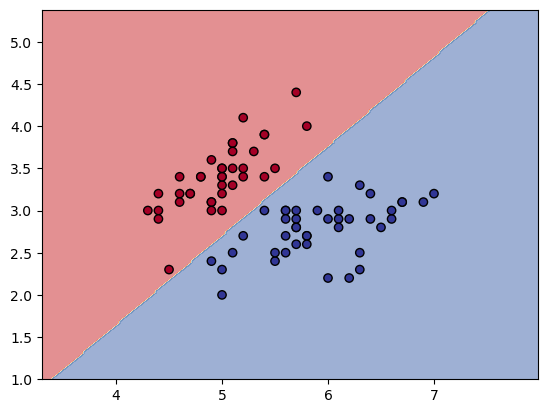

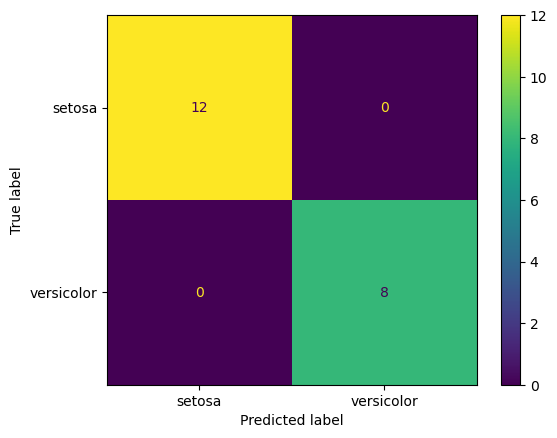

In [5]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names[:2])
disp.plot()
plt.show()